In [25]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

# library(mclust)

In [6]:
# ?mvtnorm::dmvnorm

In [41]:
source('lcic.r')

[1] "Diagonal covariance: "
     [,1] [,2]
[1,]    2    0
[2,]    0    1
[1] "Diagonal covariance: "
     [,1] [,2]
[1,]    2    0
[2,]    0    1


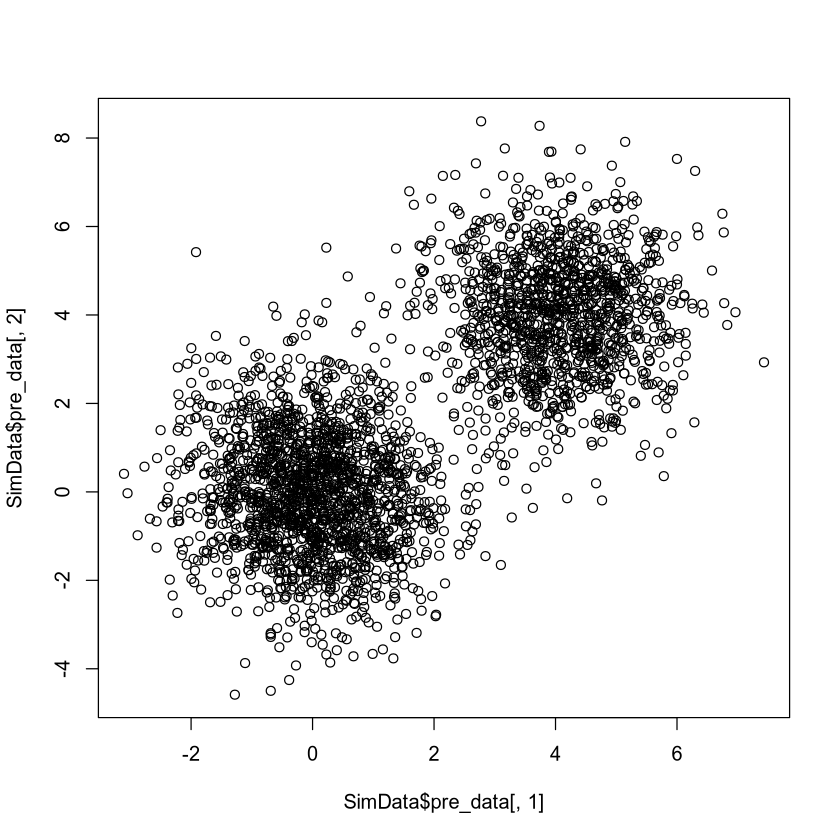

In [8]:
d = 2
n = 3000
# SimData <- get_heteroskedastic_gamma_data(d, n)
true_mean_vec_list = list(rep(0,d), rep(4,d))
true_proportions <- c(0.6, 0.4)

SimData <- get_gaussian_mixture_data(d, n, true_mean_vec_list=true_mean_vec_list, true_proportions=true_proportions)

plot(x=SimData$pre_data[,1], y=SimData$pre_data[,2])

In [31]:
num_clusters <- 2
theta_mat_init <- matrix(0, nrow=n, ncol=num_clusters)
theta_mat_init[,1] <- sample(c(0.3,0.7), size=n, replace=TRUE)
theta_mat_init[,2] <- 1 - theta_mat_init[,1]
# theta_mat_init

In [42]:
theta_mat_init_hc <- initialize_EM(SimData, num_clusters)
theta_mat_init_hc

[,1]         [,2]        
 [1,] 9.871448e-01 0.012855244 
 [2,] 9.893682e-01 0.010631839 
 [3,] 3.927898e-17 1.000000000 
 [4,] 9.967327e-01 0.003267347 
 [5,] 9.883294e-01 0.011670555 
 [6,] 9.924075e-01 0.007592532 
 [7,] 2.205594e-08 0.999999978 
 [8,] 9.981790e-01 0.001821003 
 [9,] 1.840798e-14 1.000000000 
[10,] 2.041551e-01 0.795844892 
[11,] 9.346717e-01 0.065328329 
[12,] 3.576567e-08 0.999999964 
[13,] 1.111932e-05 0.999988881 
[14,] 3.754764e-10 1.000000000 
[15,] 6.464775e-13 1.000000000 
[16,] 8.337082e-01 0.166291752 
[17,] 8.176957e-01 0.182304314 
[18,] 9.870318e-01 0.012968227 
[19,] 9.469559e-01 0.053044054 
[20,] 5.634974e-05 0.999943650 
[21,] 1.164328e-07 0.999999884 
[22,] 9.980788e-01 0.001921223 
[23,] 7.257671e-11 1.000000000 
[24,] 2.123208e-11 1.000000000 
[25,] 9.922683e-01 0.007731677 
[26,] 5.009284e-01 0.499071553 
[27,] 3.383034e-09 0.999999997 
[28,] 7.866265e-13 1.000000000 
[29,] 9.898376e-01 0.010162391 
[30,] 8.532120e-13 1.000000000 
[31,] ⋮            ⋮           
[32,] 1.983789e-07 0.9999998016
[33,] 8.154059e-10 0.9999999992
[34,] 4.196521e-10 0.9999999996
[35,] 6.256005e-08 0.9999999374
[36,] 9.917335e-08 0.9999999008
[37,] 6.451460e-06 0.9999935485
[38,] 1.154922e-08 0.9999999885
[39,] 9.596033e-13 1.0000000000
[40,] 6.821317e-07 0.9999993179
[41,] 2.106114e-17 1.0000000000
[42,] 9.990122e-01 0.0009877991
[43,] 5.731751e-10 0.9999999994
[44,] 3.086231e-01 0.6913769267
[45,] 9.946920e-01 0.0053079730
[46,] 9.893116e-01 0.0106883697
[47,] 2.512284e-09 0.9999999975
[48,] 9.974225e-01 0.0025775425
[49,] 3.799884e-12 1.0000000000
[50,] 7.443940e-10 0.9999999993
[51,] 7.583871e-11 0.9999999999
[52,] 1.367156e-07 0.9999998633
[53,] 1.654465e-08 0.9999999835
[54,] 5.446278e-14 1.0000000000
[55,] 6.759343e-12 1.0000000000
[56,] 9.610772e-16 1.0000000000
[57,] 4.697425e-08 0.9999999530
[58,] 5.761089e-01 0.4238911271
[59,] 9.880096e-01 0.0119904046
[60,] 2.186814e-02 0.9781318619
[61,] 6.395145e-07 0.9999993605

In [90]:
# num_clusters <- 1
# theta_mat_init <- matrix(rep(1,n), nrow=n)

In [29]:
# theta_mat_init
?EM_with_lcic

No documentation for ‘EM_with_lcic’ in specified packages and libraries:
you could try ‘??EM_with_lcic’

In [50]:
em_output <- EM_with_lcic(SimData, theta_mat_init_hc, num_clusters, resample_factors=c(3,3), num_iter=5)

[1] "Iter: "
[1] 1
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -3.867757
[1] "Iter: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -3.858089
[1] "Iter: "
[1] 3
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -3.841551
[1] "Iter: "
[1] 4
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -3.826208
[1] "Iter: "
[1] 5
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2
[1] "Log-likelihood: "
[1] -3.822159


In [53]:
em_output$cluster_densities[[1]]$mean_vec


[1] 4.080744 4.083890

In [52]:
em_output$pi_vec

[1] 0.3928264 0.6071736

In [15]:
sample(c(TRUE,FALSE), size=5, replace=TRUE)

[1]  TRUE FALSE  TRUE FALSE  TRUE

In [30]:
theta_weights = sample(c(0.1,0.9), size=n, replace=TRUE)

In [38]:
generate_weighted_estimator_with_logcondens_TEST <- function(SimData, theta_weights, resample_factors=c(1,1), plotting=FALSE) {
    
    M_resample <- resample_factors[1]*SimData$n
    N_resample <- resample_factors[2]*SimData$n
    
    resampled_data <- generate_weighted_samples(SimData$pre_data, theta_weights, M_resample+N_resample)
    
    centered_resampled_data <- center_data_fun(resampled_data)
    
    centered_data_for_cov <- centered_resampled_data$centered_data[1:M_resample,]
    centered_data_for_dens <- centered_resampled_data$centered_data[(M_resample+1):(M_resample+N_resample),]
    

    cov_compute <- cov.wt(x=centered_data_for_cov, center=FALSE, method="ML")
    # weights_vec_renormalized <- weights_vec/(sum(weights_vec)*SplitData$n_cov_estimation)
    # weighted_cov_compute <- cov.wt(x=SplitData$data_cov_estimation, wt=weights_vec, center=center, method="ML")
    # weighted_emp_cov_mat <- cov_compute$cov
    # weighted_emp_mean <- cov_compute$center

    W_hat <- t(princomp(covmat=cov_compute$cov, fix_sign=TRUE)$loadings)
    unmixed_obs <- centered_data_for_dens %*% t(W_hat)
    # print(centered_data_for_dens)
    print("PCA done!")
    
    marginals <- list()
    
    for (i in 1:SimData$d) {
        print("Marginal: ")
        print(i)
        out1 <- logConDens(unmixed_obs[,i], smoothed = FALSE)
        if (plotting){
            plot(out1)
        }
        marginals[[i]] <- out1
    }
    return(list("W_hat"=W_hat, "marginals"=marginals, "mean_vec"=centered_resampled_data$mean_vec, "unmixed_obs"=unmixed_obs))
}

test_output <- generate_weighted_estimator_with_logcondens_TEST(SimData, theta_weights, resample_factors=c(1,1))

[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2


In [46]:

xg <- seq(-4, 8, by=0.2)
yg <- xg


In [54]:
my_f <- function(x, y){
    evaluate_mixture_density_vectorized(em_output$cluster_densities, em_output$pi_vec, matrix(c(x,y), nrow=1))
}



In [55]:
z_vals = matrix(0, nrow=length(xg), ncol=length(yg))

for (ix in 1:length(xg)){
    for (iy in 1:length(xg)){
        z_vals[ix, iy] <- my_f(xg[ix], yg[iy])
    }
}

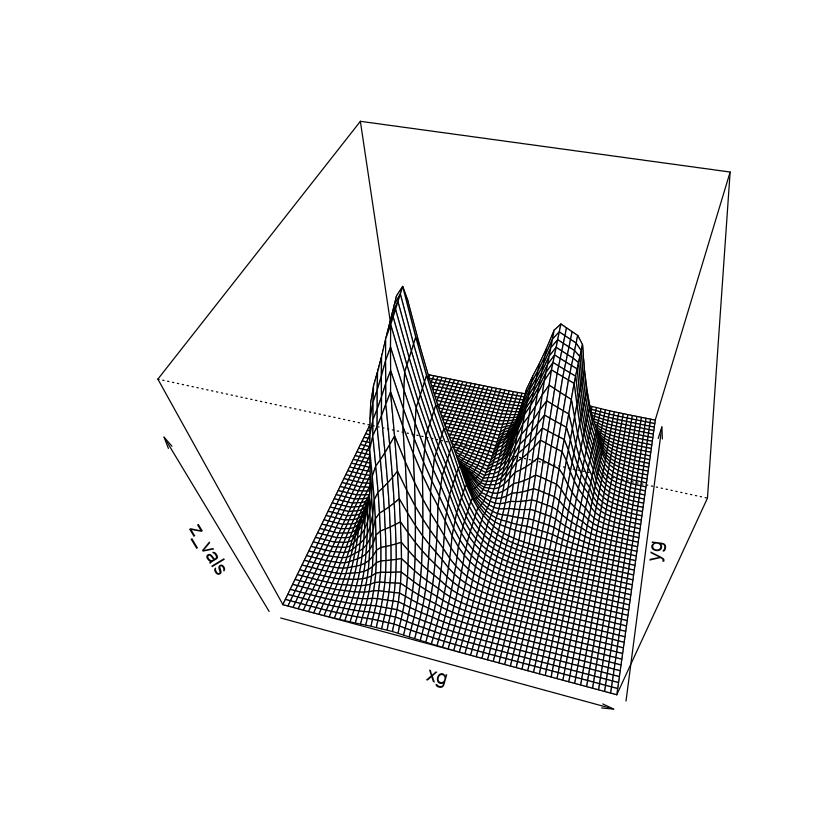

In [56]:
persp(xg, yg, z_vals, theta=15, phi=50)

In [168]:
data.matrix(expand.grid(xg, yg))

Var1 Var2
 [1,] -4.0 -4  
 [2,] -3.8 -4  
 [3,] -3.6 -4  
 [4,] -3.4 -4  
 [5,] -3.2 -4  
 [6,] -3.0 -4  
 [7,] -2.8 -4  
 [8,] -2.6 -4  
 [9,] -2.4 -4  
[10,] -2.2 -4  
[11,] -2.0 -4  
[12,] -1.8 -4  
[13,] -1.6 -4  
[14,] -1.4 -4  
[15,] -1.2 -4  
[16,] -1.0 -4  
[17,] -0.8 -4  
[18,] -0.6 -4  
[19,] -0.4 -4  
[20,] -0.2 -4  
[21,]  0.0 -4  
[22,]  0.2 -4  
[23,]  0.4 -4  
[24,]  0.6 -4  
[25,]  0.8 -4  
[26,]  1.0 -4  
[27,]  1.2 -4  
[28,]  1.4 -4  
[29,]  1.6 -4  
[30,]  1.8 -4  
[31,] ⋮    ⋮   
[32,] 2.2  8   
[33,] 2.4  8   
[34,] 2.6  8   
[35,] 2.8  8   
[36,] 3.0  8   
[37,] 3.2  8   
[38,] 3.4  8   
[39,] 3.6  8   
[40,] 3.8  8   
[41,] 4.0  8   
[42,] 4.2  8   
[43,] 4.4  8   
[44,] 4.6  8   
[45,] 4.8  8   
[46,] 5.0  8   
[47,] 5.2  8   
[48,] 5.4  8   
[49,] 5.6  8   
[50,] 5.8  8   
[51,] 6.0  8   
[52,] 6.2  8   
[53,] 6.4  8   
[54,] 6.6  8   
[55,] 6.8  8   
[56,] 7.0  8   
[57,] 7.2  8   
[58,] 7.4  8   
[59,] 7.6  8   
[60,] 7.8  8   
[61,] 8.0  8

In [120]:
matrix(c(3,4), nrow=1)

[,1] [,2]
[1,] 3    4

In [35]:
test_output$unmixed_obs

Comp.1    Comp.2   
[1,] 0.8456721 -1.849459

In [77]:
mt <- matrix(c(2,NaN, NaN, 5), nrow=2)
mt

[,1] [,2]
[1,]   2  NaN 
[2,] NaN    5

In [79]:
mt[is.na(mt)] <- 0

In [80]:
mt

[,1] [,2]
[1,] 2    0   
[2,] 0    5

In [10]:
highclust <- hc( modelName="VVV", data=SimData$pre_data)
highclust

Call:
hc(data = SimData$pre_data, modelName = "VVV") 

Model-Based Agglomerative Hierarchical Clustering 
Model name        = VVV 
Use               = VARS 
Number of objects = 3000 

In [13]:
k <- 2

class <- c( hclass( highclust, k ) )
class

[1] 1 1 2 1 1 1 2 1 2 2 1 2 2 2 2 1 2 1 1 2 2 1 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2
  [38] 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2
  [75] 2 1 2 1 2 2 2 2 2 1 1 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 1 1
 [112] 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 [149] 1 2 1 2 2 2 2 1 2 2 1 2 2 1 1 1 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 2
 [186] 1 1 2 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2
 [223] 2 1 2 2 1 2 1 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 1
 [260] 1 2 1 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 2 2 2 2
 [297] 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 1 1 1 2
 [334] 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1
 [371] 2 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2
 [408] 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 [445] 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 1
 [482] 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2
 [519] 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 1 1 2 1 1 2 1 2
 [556] 1 2 2 1 2 2 2 1 2 2 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 1
 [593] 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 1 1 1 1 1 2 2
 [630] 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2
 [667] 2 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 1 1 2 2 1 2 2 2 2 2
 [704] 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 2 1 2
 [741] 2 1 1 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 2
 [778] 2 2 1 2 1 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1
 [815] 1 2 2 1 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 2 2 2 2 2 2 1 2 2 1 2 1 1 1 1 2 2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 2 2 1 2 2 1
 [889] 1 2 1 2 2 2 1 2 1 2 2 1 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2
 [926] 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 2 2
 [963] 1 2 2 2 1 2 1 2 2 1 1 1 2 2 2 1 2 2 1 2 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2
[1000] 1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2 2 2
[1037] 2 1 2 1 1 2 1 2 2 1 2 1 2 2 2 2 1 2 1 2 1 1 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2
[1074] 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 1
[1111] 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 1 2 2 1
[1148] 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2
[1185] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 2 1 1 2 2 1 1 2
[1222] 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2
[1259] 2 2 2 1 2 2 1 2 1 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 1 1
[1296] 2 2 1 1 2 1 2 1 1 2 2 1 2 2 2 2 2 1 2 2 1 2 1 1 2 2 2 1 2 2 1 2 2 1 1 1 2
[1333] 2 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 2 1 1 2 1 2 1 2 2 1
[1370] 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 1 2
[1407] 2 1 2 1 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1
[1444] 2 2 2 2 2 2 1 2 2 1 1 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2
[1481] 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 1 1 1 2 2 2 2 1 2
[1518] 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 1
[1555] 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1 1 2 1 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2
[1592] 2 1 2 1 2 1 2 2 2 1 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2
[1629] 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1
[1666] 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 1 2 2 2 1 1 2
[1703] 2 2 1 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1
[1740] 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 1 2 2 1 2 1 2 2 2 2 2 2
[1777] 1 2 2 1 1 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2
[1814] 2 2 2 2 1 1 1 2 2 1 2 2 2 2

In [19]:
props = rep(0,k)
y <- matrix( 0, nrow=n, ncol=k )
for( i in 1:k ) {
      props[ i ] <- sum( class==i ) / n
      ss <- SimData$pre_data[ class==i, ]
      y[ , i ] <- dmvnorm( SimData$pre_data, mean=colMeans(ss), sigma=var( ss ))
    }
# y

[,1]         [,2]        
 [1,] 1.202061e-01 0.0007366598
 [2,] 3.215761e-02 0.0001626205
 [3,] 1.254267e-18 0.0150269552
 [4,] 7.759922e-02 0.0001197058
 [5,] 7.736290e-02 0.0004298962
 [6,] 1.072945e-01 0.0003862916
 [7,] 2.772472e-09 0.0591537997
 [8,] 6.237102e-02 0.0000535459
 [9,] 1.096452e-15 0.0280301075
[10,] 6.801034e-03 0.0124762529
[11,] 5.695848e-02 0.0018734491
[12,] 5.002733e-09 0.0658236594
[13,] 9.055060e-07 0.0383221013
[14,] 2.938794e-11 0.0368321885
[15,] 4.254092e-14 0.0309666730
[16,] 5.110579e-02 0.0047969788
[17,] 3.078778e-02 0.0032301653
[18,] 2.701928e-02 0.0001670568
[19,] 1.807834e-02 0.0004765479
[20,] 6.549701e-06 0.0546948131
[21,] 1.474966e-08 0.0596138930
[22,] 9.997580e-02 0.0000905626
[23,] 7.220315e-12 0.0468166043
[24,] 1.197811e-12 0.0265483098
[25,] 1.225087e-01 0.0004492132
[26,] 1.787416e-02 0.0083801902
[27,] 4.163046e-10 0.0579089866
[28,] 6.733705e-14 0.0402834401
[29,] 1.543596e-01 0.0007457729
[30,] 7.215092e-14 0.0397947679
[31,] ⋮            ⋮           
[32,] 2.819914e-08 6.689311e-02
[33,] 3.651365e-11 2.107281e-02
[34,] 2.215534e-11 2.484449e-02
[35,] 8.694298e-09 6.540011e-02
[36,] 2.712112e-09 1.286926e-02
[37,] 3.742468e-07 2.729847e-02
[38,] 1.171195e-09 4.772188e-02
[39,] 8.263522e-14 4.052421e-02
[40,] 9.571193e-08 6.602959e-02
[41,] 5.054816e-19 1.129443e-02
[42,] 3.142739e-02 1.462336e-05
[43,] 4.267273e-11 3.503517e-02
[44,] 1.143314e-02 1.205294e-02
[45,] 1.417219e-01 3.558919e-04
[46,] 1.098290e-01 5.583884e-04
[47,] 1.547338e-10 2.898395e-02
[48,] 1.226485e-01 1.491523e-04
[49,] 3.061352e-13 3.791263e-02
[50,] 9.390310e-11 5.936331e-02
[51,] 8.055613e-12 4.998604e-02
[52,] 1.747880e-08 6.016370e-02
[53,] 1.459991e-09 4.152731e-02
[54,] 3.711526e-15 3.206961e-02
[55,] 6.770054e-13 4.713339e-02
[56,] 3.914817e-17 1.916877e-02
[57,] 5.222091e-09 5.231493e-02
[58,] 2.115118e-02 7.323614e-03
[59,] 1.482819e-01 8.468411e-04
[60,] 3.204741e-04 6.745585e-03
[61,] 8.450128e-08 6.218042e-02